torch.Size([1, 200, 300, 10]) torch.Size([1, 200, 300, 1])
dict_keys(['camera_ids', 'gaussian_ids', 'radii', 'means2d', 'depths', 'conics', 'opacities', 'tile_width', 'tile_height', 'tiles_per_gauss', 'isect_ids', 'flatten_ids', 'isect_offsets', 'width', 'height', 'tile_size', 'n_cameras'])


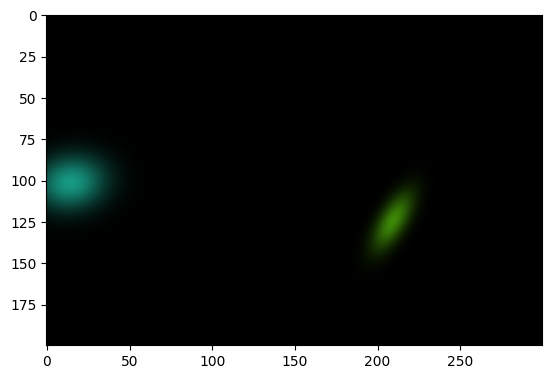

In [6]:
import torch
from gsplat.rendering import rasterization
import matplotlib.pyplot as plt 

device="cuda"
# define Gaussians
means = torch.randn((100, 3), device=device)
quats = torch.randn((100, 4), device=device)
scales = torch.rand((100, 3), device=device) * 0.1
colors = torch.rand((100, 10), device=device)
opacities = torch.rand((100,), device=device)
# define cameras
viewmats = torch.eye(4, device=device)[None, :, :]
viewmats.requires_grad_()  # Enable requires_grad for gradient computation
viewmats.retain_grad()  # Retain gradients for this non-leaf tensor

Ks = torch.tensor([
   [300., 0., 150.], [0., 300., 100.], [0., 0., 1.]], device=device)[None, :, :]
width, height = 300, 200
# render
colors, alphas, meta = rasterization(
   means, quats, scales, opacities, colors, viewmats, Ks, width, height, sh_degree=None
)
print (colors.shape, alphas.shape)
print (meta.keys())
plt.imshow(colors.squeeze()[:, :, :3].detach().cpu().squeeze())
plt.show()

In [24]:
x = torch.rand((3, 3), requires_grad=True) 
y = torch.linalg.det(x)  # This keeps the operation within the computational graph
y.backward()

print(x.grad)  # Prints the gradient of y with respect to x


tensor([[ 0.5249, -0.3605,  0.0358],
        [-0.3371,  0.3842, -0.1248],
        [-0.3044,  0.1043,  0.1456]])


In [37]:
fake_loss = colors.mean()
fake_loss.backward(retain_graph=True)

In [38]:
viewmats.grad

tensor([[[-1.2112e-03, -1.2240e-03, -8.6711e-03, -2.3692e-03],
         [ 2.4392e-03,  1.2605e-03, -6.7613e-03, -5.3655e-03],
         [ 7.4981e-04,  5.6185e-04, -4.9343e-05, -6.2275e-04],
         [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00]]],
       device='cuda:0')

In [1]:
import sys
sys.path.append("..")  # Add the parent directory to the path

In [2]:
from gaussian_splatting.datasets.colmap import Parser

dataset = "hope"
object_id = 1
data_dir = f"/home/sergio/onboarding_stage/data/{dataset}/obj_{object_id:06d}/align/"

parser = Parser(
    data_dir=data_dir
)


[Parser] 14 images, taken by 14 cameras.
